In [317]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
import statsmodels.api as sm

In [318]:
df = pd.read_csv('texas-history.csv')
df.head(5)

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,TX,44451.0,NaN,84,NaN,NaN,NaN,4721.0,0,...,19907384,76040,1033285.0,2664340.0,NaN,NaN,NaN,0,19907384,76040
1,2021-03-06,TX,44367.0,NaN,233,NaN,NaN,NaN,4921.0,0,...,19831344,11292,1025375.0,2630435.0,NaN,NaN,NaN,0,19831344,11292
2,2021-03-05,TX,44134.0,NaN,256,NaN,NaN,NaN,5065.0,0,...,19820052,55875,1025537.0,2624414.0,NaN,NaN,NaN,0,19820052,55875
3,2021-03-04,TX,43878.0,NaN,315,NaN,NaN,NaN,5263.0,0,...,19764177,56522,1022798.0,2606279.0,NaN,NaN,NaN,0,19764177,56522
4,2021-03-03,TX,43563.0,NaN,297,NaN,NaN,NaN,5508.0,0,...,19707655,64597,1020452.0,2564354.0,NaN,NaN,NaN,0,19707655,64597


<AxesSubplot:xlabel='date'>

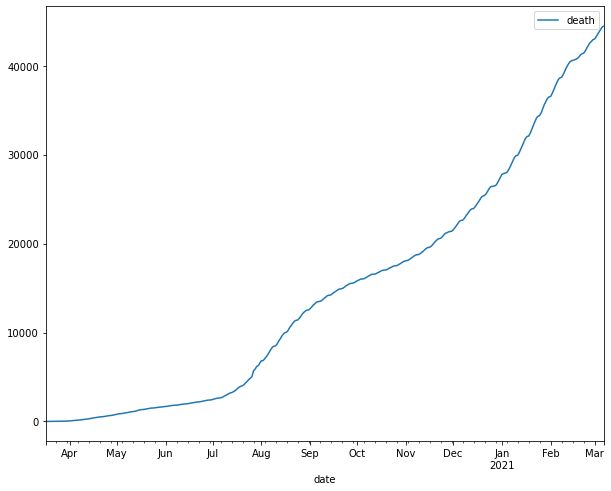

In [319]:
df = df[['date' , 'death']]
df['date'] = pd.to_datetime(df['date'])
series = df.resample('D', on = 'date').mean()
series.isnull().sum()
series = series.dropna()
series.head()
series.plot()

In [320]:
series.head()

,death
date,
2020-03-17,1.0
2020-03-18,2.0
2020-03-19,3.0
2020-03-20,5.0
2020-03-21,5.0


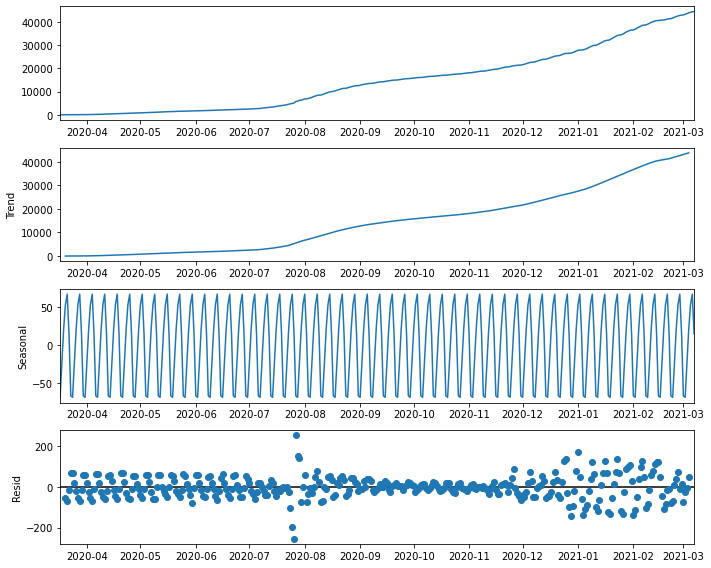

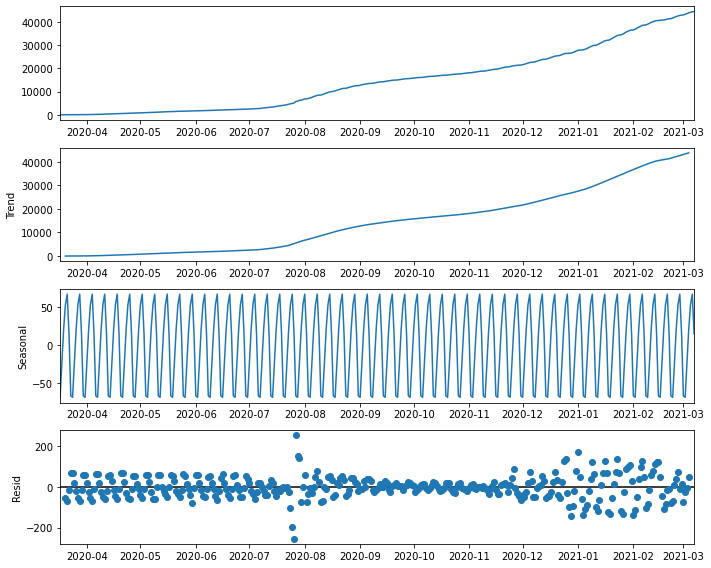

In [321]:
from pylab import rcParams
rcParams['figure.figsize']=10,8
decomposition=sm.tsa.seasonal_decompose(series,model='additive')
decomposition.plot()

# آزمون مانایی

In [322]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(series)
print("p_value=",test_result[1])

p_value= 0.9926792744832683


## چون پی ولیو بیشتر از 5 درصد است بنابراین مانا نبودن رد نمی شود. برای مانا کردن از روی داده ها لگاریتم و جذر می گیریم.

In [323]:
series = np.log(series)
series = series.dropna()
test_result=adfuller(series)
print("p_value=",test_result[1])

p_value= 0.3052388034245749


In [324]:
import numpy as np
series = np.sqrt(series)
series = series.dropna()
test_result=adfuller(series)
print("p_value=",test_result[1])

p_value= 0.001078955117121929


## بنابراین بعد از یک لگاریتم و یک جذر به مانایی رسیدیم

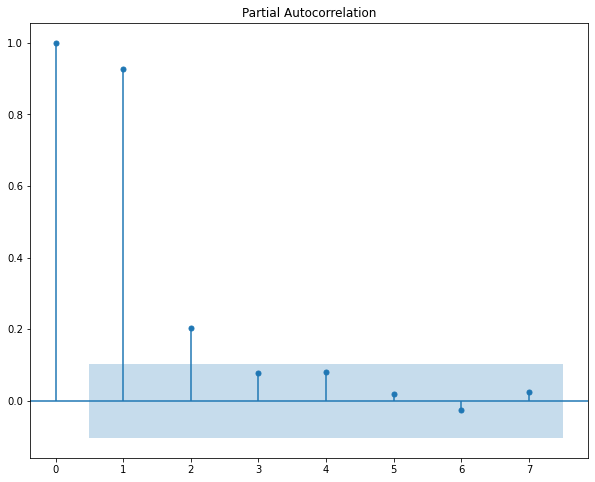

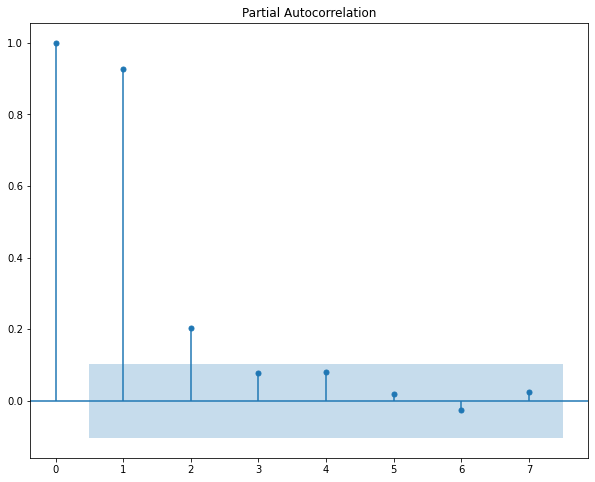

In [325]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series,lags=7)

# مدل سازی با تست و ترین دیتا

In [326]:
series.size

356

### چهل داده آخر به عنوان تست در نظر گرفته شدند.

## Lag = 7

In [327]:
from statsmodels.tsa.ar_model import AutoReg
train_data=series[:series.size-40]
test_data=series[series.size-40:]
ar_model=AutoReg(train_data,lags=7).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  death   No. Observations:                  316
Model:                     AutoReg(7)   Log Likelihood                1170.790
Method:               Conditional MLE   S.D. of innovations              0.005
Date:                Wed, 12 Jan 2022   AIC                            -10.358
Time:                        01:12:18   BIC                            -10.249
Sample:                    03-24-2020   HQIC                           -10.314
                         - 01-26-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0240      0.005      4.572      0.000       0.014       0.034
death.L1       1.2320      0.051     24.138      0.000       1.132       1.332
death.L2       0.1369      0.077      1.778      0.0

C:\Users\vista\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


## ضریب ال دو معنی دار نیست

In [328]:
prediction=ar_model.predict(start=len(train_data),end=series.size-1)

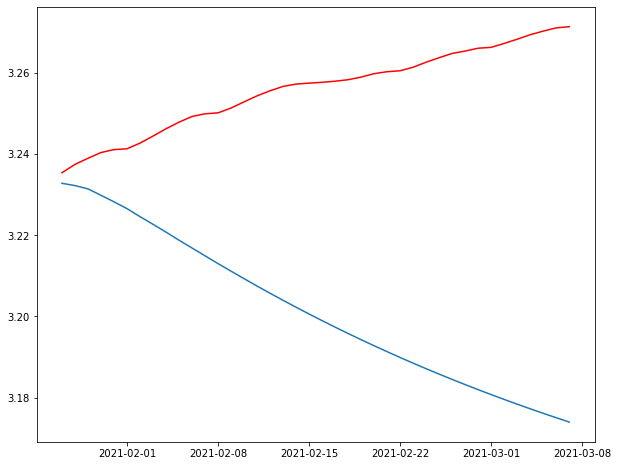

In [329]:
plt.plot(prediction)
plt.plot(test_data,color='red')

## Lag = 10

In [330]:
ar_model2=AutoReg(train_data,lags=10).fit()
print(ar_model2.summary())

                            AutoReg Model Results                             
Dep. Variable:                  death   No. Observations:                  316
Model:                    AutoReg(10)   Log Likelihood                1296.242
Method:               Conditional MLE   S.D. of innovations              0.003
Date:                Wed, 12 Jan 2022   AIC                            -11.232
Time:                        01:12:21   BIC                            -11.086
Sample:                    03-27-2020   HQIC                           -11.173
                         - 01-26-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0104      0.004      2.937      0.003       0.003       0.017
death.L1       1.0456      0.048     21.795      0.000       0.952       1.140
death.L2      -0.0339      0.074     -0.455      0.6

C:\Users\vista\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


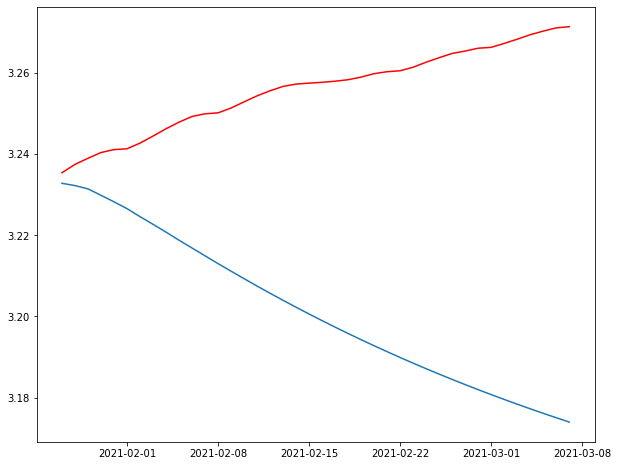

In [316]:
prediction2=ar_model.predict(start=len(train_data),end=series.size-1)
plt.plot(prediction2)
plt.plot(test_data,color='red')